# Palmer Penguins

***

This notebook contains my analysis of the famous Palmer Penguins dataset. 

![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

_The Palmer Penguins, artwork by @allison_horst_



# Imports

***

The following Libraries were imported during the course of this project. 

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. [NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in conjunction with its numerical mathematics extension NumPy.

We use [Seaborn](https://seaborn.pydata.org/) which is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas 



In [1]:
#Data Frames & Data Manipulation Libraries
import pandas as pd

#Mathematical Operations & Data Manipulation Libraries
import numpy as np

#Data Visualization & Plotting Libraries
import matplotlib.pyplot as plt

#Data Visualization & Plotting Libraries
import seaborn as sns

# Load data

****

Load the palmer penguins data set from a URL. We have imported this file from the official seaborn github account. 

In [2]:
#Load the penguins dataset.

#Our variable df is a DataFrame object that contains the penguins dataset. This dataframe consists of various data series that contain information about the penguins.
#For details on how to load in the penguins dataset as a CSV file, please refer to the following code snippet.
#Reference URL: https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Variables

The data is now loaded, and we can inspect it. From inspection the dataset contains 344 rows and seven columns. Each row gives the information that was collected for each individual penguin. For each penguin there are seven possible variables.

The seven variables in the dataset are

- **species**: Penguin species (Adelie, Chinstrap, Gentoo)
- **island**: Island name (Biscoe, Dream, Torgersen)
- **bill_length_mm**: Length of the bill in millimetres
- **bill_depth_mm**: Depth of the bill in millimetres
- **flipper_length_mm**: Length of the flipper in millimetres
- **body_mass_g**: Body mass of Penguins in grams
- **sex**: Sex of the Penguins (male, female)

The culmen is the upper ridge of a bird’s bill. In the simplified penguins data that we are using, culmen length and depth are renamed as variables bill_length_mm and bill_depth_mm to be more intuitive.

For this penguin data, the culmen (bill) length and depth are measured as shown below 

<div align='center'><img src="Images/bill_penguin.png" alt="Bill lenght/depth"></div>

<div align='center'> <i>The Palmer Penguins, artwork by @allison_horst</i> </div>


The bill length and bill depth were measured in mm to an accuracy of 0.1mm using a dial calipers. The flipper length was measured in mm using a ruler to an accuracy of 1mm. The body 
mass of the penguins was measured in grams using 5kg ±25g or 10kg ±50g Pesola spring scales and a weigh bag. A small amount of whole blood was smeared on clean filter paper stored in 
a 1.5ml micro-centrifuge tube for molecular sexing. [Kirsten Gorman, Tony Williams, William Fraser et al](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081)

In [3]:
#Look at this data
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# Inspect data
***

Firstly let's look at the first penguin in the dataset. We can use the iloc() function to do this. As shown below our first penguin is a Male 'Adelie' penguin who was analysed on the Torgersen Island, and who had a body mass of 3750g.

In [4]:
# Look at the first row. This represents the first penguin in the dataset. 
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

Let us look at one of the columns now. To do this just type the name of the column you want to look at, as shown below for the 'sex' column which lists the sex of each penguin.

In [5]:
#Sex of penguins
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

Not hugely informative right, however if we combine this with the value_counts() function, we can then get a clear picture of the values of each sex in the dataset. This is much more useful information for us.

In [6]:
#Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

## Assigned data-types in the dataset
---

We can explore our dataset further by checking its metadata using the info() function as shown below. We can get several useful pieces of information from this method. Firstly we can see that the dataset has being assigned 3 object types, and 4 numerical types by pandas when first loaded. The numerical types all have all being assigned a 64bit float value. 

We can also see that several columns have null values.  The sex column has 11 null values where perhaps it was not possible to distinguish the sex of those 11 penguins at the time of recording the information. The bill length, bill depth, flipper length and body mass columns all have 2 null values also. We can confirm these figure by combining the isnull() function with the sum() function as shown below also.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
#Count the number of missing values in each column.
df.isnull().sum()


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Exploring datatypes further
---

 
It is imperative to choose the correct data types to represent the various variables in the datasets we are modelling. Data types can be Quantitative(Numerical) or Qualitative(Categorical). Quantitative data types can be further sub-divided as discrete or continuous. Qualitative data types can be further sub-divided as nominal, ordinal or binary. The image below gives us a good summary with some examples.


<div align='center'><img src="Images/data_types.jpeg" alt="Data Types"></div>



Let's look at each of the variable types now in more detail.

1. **Species**: The variety of species column is a categorical variable, as it represents different classes or categories of Penguins. There is no inherent ranking or order 
among the species and therefore the scale is **nominal**

1. **Island**: The island column is also a categorical variable, as it represents places which have no inherent ranking or order which means the scale here is also 
**nominal**

1. **bill_length**: The bill length is a numerical variable as it represents a measurable quality with a meaningful zero point. The scale type is **ratios** as they have a 
true zero point and no negative values. The ratios between values are meaningful, so if one observation has a value twice as large as another, then it means that the 
quantity being measured is also twice as large.

1. **bill_depth**: The bill depth is again a numerical variable. Again, the scale type is **ratio** for the same reasons as given above for bill length and bill 
length.

1. **flipper_length**: The flipper length is again a numerical variable. Again, the scale type is **ratio** for the same reasons as given above for bill length and bill 
length.

1. **body_mass**: The body mass is again a numerical variable. Again, the scale type is **ratio** for the same reasons as given above for bill length and bill 
depth.

1. **sex**: The sex column is a categorical variable. There is no inherent ranking and therefore the scale is **nominal**




 As shown, four columns contain floating point data. If we summarize them by column, we can see that the floating point value for flipper length and body mass is zero. Are the values in all rows for these columns zero? Let's check this out.....  
 
 To do this, if we replace all the NA values in the body mass column with zero, convert this to a numpy array, and then sum up the values of the integers (we need to convert floats to ints to prove out), and if the value has not changed, we know that all floating point values must be zero. This is demonstrated for body mass below...

In [9]:
df[["bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g"]].sum()

bill_length_mm         15021.3
bill_depth_mm           5865.7
flipper_length_mm      68713.0
body_mass_g          1437000.0
dtype: float64

In [10]:
df_no_na =df[["flipper_length_mm","body_mass_g"]].fillna(0)

body_mass_g = np.array(df_no_na['body_mass_g'], dtype=int).sum()

body_mass_g


1437000

So what does this mean. Well, this means simply that pandas has assigned a float64 vaule to two columns in our dataset which would work better as int64 datatypes. Therefore we will assign these values as int64 when we are tidying up our dataset.

After further research on [categorical datatypes](https://medium.com/swlh/categorical-data-in-pandas-9eaaff71e6f3), and [working with categorical datatypes](https://app.datacamp.com/learn/courses/working-with-categorical-data-in-python), it was noted that if a column contains limited or a fixed number of non-numerical values, it should be assigned the pandas data type of category. This uses less memory and could potentially save a lot of memory in the case where a large dataset is used. Therefore we can see that the columns of species, island and sex should be assigned the data type category as they meet this criteria. This will also be done below when we are tidying up our data.

In [12]:
#Describe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data Visualisation 

### Pie Chart - Proportion of each species.

We can firstly look at a pie chart to examine the overall penguin population by species. This has been done below. We can see that the 'Adelie' penguin group has the largest population with 44.2%, while the 'Chinstrap' penguin has the smallest population at 19.8%.

Text(0.5, 1.0, 'Proportion of penguins by species')

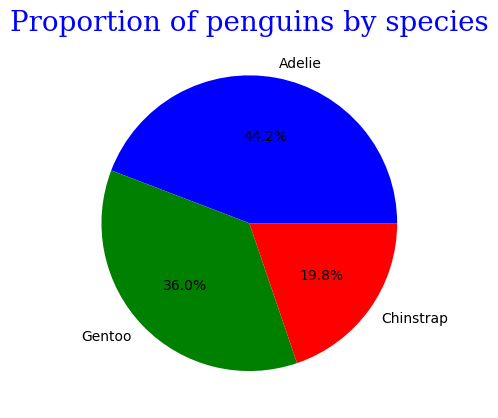

In [13]:
#Pie chart for categorical data of species

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
species_counts = df['species'].value_counts() #Count the number of penguins of each species.

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Create a pie chart of the species data.
fig, ax = plt.subplots()

ax.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=colors) 
#autopct='%1.1f%%' means that the percentages will be shown on the pie chart.
ax.set_title('Proportion of penguins by species', fontdict = font1)


### Pie Chart - Proportion of penguins by Island

We can also look at a pie-chart to gauge the percentage of penguins on each island. This has being done below. Here we can see that the 'Biscoe' penguins account for almost half of the total penguins in the dataset.

Text(0.5, 1.0, 'Proportion of penguins by island')

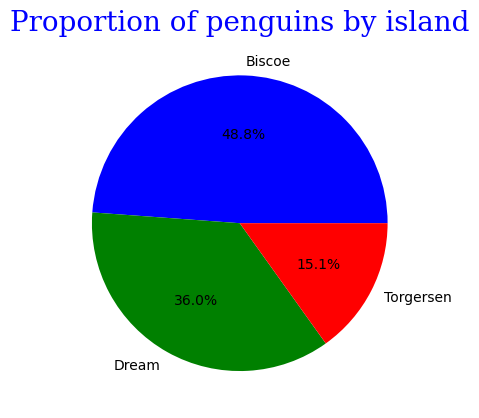

In [14]:
#Pie chart for categorical data of species

#https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

island_counts = df['island'].value_counts()

colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

fig, ax = plt.subplots()

ax.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', colors=colors) 
#autopct='%1.1f%%' means that the percentages will be shown on the pie chart.
plt.title('Proportion of penguins by island', fontdict = font1)


  
### Simple bar chart - Count the number of each species in the dataset

We can count the total number of each species, and plot this information as a simple bar chart. This has being completed below. Also below is a second plot in the same figure to remind us of the proportion of each penguin as found above. We can see that both graphs tell a similar story. The Adelie penguins have by far the biggest population across the three islands, while the chinstrap penguins have the smallest population. 

Text(0.5, 0.98, 'Simple Analysis of Penguins by Count')

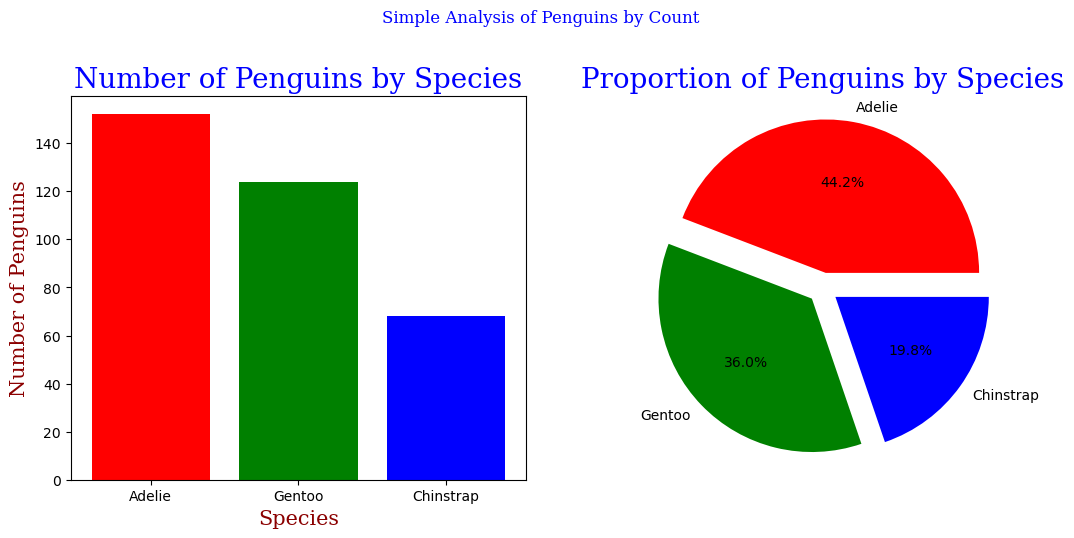

In [15]:
#Count the number of penguins of each species.
species_counts = df['species'].value_counts() #Count the number of penguins of each species.

#Count the unique species.
unique_species = species_counts.index #Get the unique species.

#Plot the number of penguins of each species.
fig, ax = plt.subplots(1,2)

#Set the colors for the bar chart and pie chart.
colors = ['red', 'green', 'blue'] 

#Set the font for the bar chart and pie chart.
font1 = {'family':'serif','color':'blue','size':20} 
font2 = {'family':'serif','color':'darkred','size':15}

#Create a bar chart of the species data.
ax[0].bar(unique_species, species_counts, color=colors) 
#Create a pie chart of the species data.
ax[1].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', colors=colors, explode=(0.1, 0.1, 0.1))

#Set the title, x-axis label, and y-axis label for the bar chart.
ax[0].set_title('Number of Penguins by Species', fontdict=font1) 
ax[0].set_xlabel('Species', fontdict=font2) 
ax[0].set_ylabel('Number of Penguins', fontdict=font2)

#Set the title for the pie chart.
ax[1].set_title('Proportion of Penguins by Species', fontdict=font1)

#Set the size of the figure.
fig.set_size_inches(12, 6)

#Adjust the layout of the figure.
fig.tight_layout(pad=5.0)

#Set the title of the figure.
fig.suptitle('Simple Analysis of Penguins by Count', fontdict=font1)



### Stacked Bar Chart - Penguins present on each island

Okay, so what if we wanted to look at which penguins are present on each island, and how many of each are present. While we can gauge some good information from both the pie charts and the simply bar chart above, it would be nice to be able to view a breakdown of each penguin species on each island. This has being completed in the following section. By combining the groupby() function with the unique() function, we can get firstly get a count of each island that each penguin species is found on. We can then create a variable called island and then by the above groupby() with the value_counts method() we can get a count for each species on each island.

In [16]:
#Firstly list the islands that each species of penguin can be found on.
df.groupby('species')['island'].unique()

species
Adelie       [Torgersen, Biscoe, Dream]
Chinstrap                       [Dream]
Gentoo                         [Biscoe]
Name: island, dtype: object

In [17]:
#Next list the count of each penguin species found on each island.
islands = df.groupby('species')['island'].value_counts().unstack()

islands

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44.0,56.0,52.0
Chinstrap,NaN,68.0,NaN
Gentoo,124.0,NaN,NaN


Text(0, 0.5, 'Number of penguins')

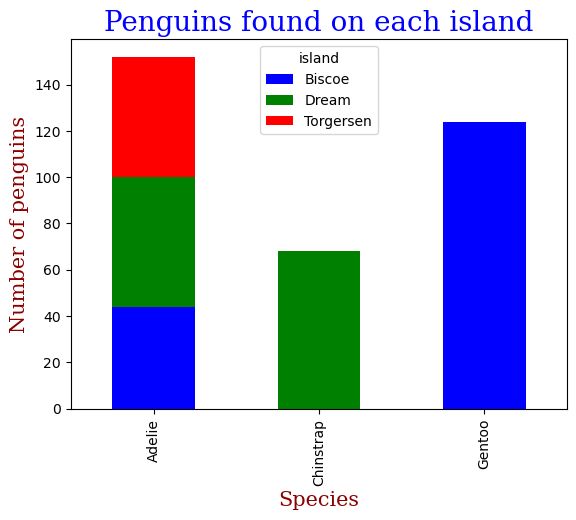

In [18]:
#Plot a stacked bar chart of the penguins found on each island using the above datas
#create a color list
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Create a figure and axis
fig, ax = plt.subplots()

#create a stacked bar chart. The stacked bar chart shows the number of penguins of each species on each island.
ax = islands.plot(kind='bar', stacked=True, color=colors, ax=ax)
ax.set_title('Penguins found on each island', fontdict=font1)

#Add x and y labels
ax.set_xlabel('Species', fontdict=font2)
ax.set_ylabel('Number of penguins', fontdict=font2)


### Histograms - Bill length

The following code will plot a histogram of the bill-length of each species of penguin in a different colour. Here we are using the object orientated approach to doing this with matplotlib. Firstly we are creating new dataframe with each distinct species of penguins and then we are creating a plot consisting of the bill length vs frequency for each species of penguin in a different colour.

In [19]:
# Firstly create a new dataframe for each distinct species. Lets start with Adelie.
adelie_df = df[df['species'] == 'Adelie']


#View the dataframe
adelie_df


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE
149,Adelie,Dream,37.8,18.1,193.0,3750.0,MALE
150,Adelie,Dream,36.0,17.1,187.0,3700.0,FEMALE


So, now that we can see that we can create a separate dataframe for each penguin species, we need to repeat what we have done above for the chinstrap and Gentoo penguins as well. We know it works so we won't list them out going forward. 

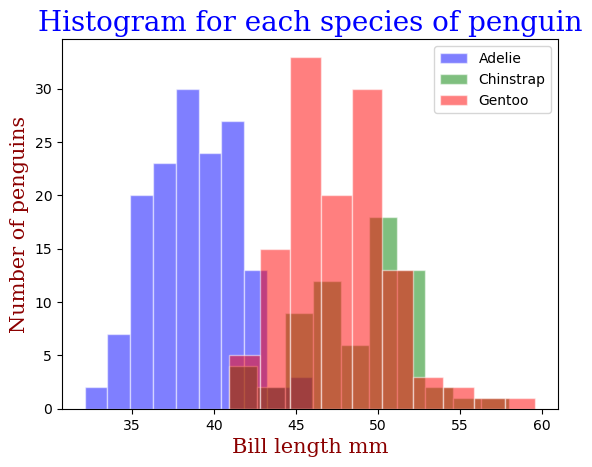

In [20]:
adelie = df[df.species == "Adelie"] #Create a new data frame with only the Adelie penguins.
chinstrap = df[df.species=='Chinstrap']#Create a new data frame with only the Chinstrap penguins.
Gentoo = df[df.species=='Gentoo'] #Create a new data frame with only the Gentoo penguins.

fig, ax = plt.subplots() #Create a new figure and axis. 

variable = "bill_length_mm" #Choose a variable to plot the histogram of.

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot a histogram of the variable for the Adelie penguins.
ax.hist(adelie[variable], bins=10, label="Adelie", color="blue", alpha=0.5, edgecolor="white") 
#bins=10 means that the histogram will have 10 bins. 
#alpha=0.5 means that the bars will be semi-transparent. alpha=1 would mean that the bars are opaque.
#alpha=0 would mean that the bars are completely transparent.
ax.hist(chinstrap[variable], bins=10, label="Chinstrap", color="green", alpha=0.5, edgecolor="white")
ax.hist(Gentoo[variable], bins=10,  label="Gentoo", color="red", alpha=0.5, edgecolor="white")

ax.set_xlabel(variable.capitalize().replace('_', ' '), fontdict=font2) #Set the x-axis label.
ax.set_ylabel("Number of penguins", fontdict=font2) #Set the y-axis label.

ax.set_title("Histogram for each species of penguin", fontdict=font1) #Set the title of the plot.
ax.legend() #Show the legend.


Seaborn makes things much easier for us. We could do the same as above by using the simple seaborn code below. The histogram using seaborn library is called by using the histplot function. 


Text(0.5, 1.0, 'Histogram for each species of penguin')

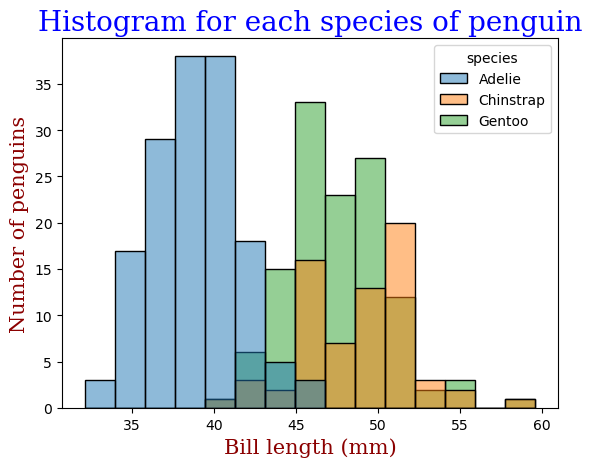

In [21]:
sns.histplot(df, x="bill_length_mm",  stat='count', bins=15, hue="species") 
#Plot a histogram of the bill length for each species of penguin using seaborn.

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Bill length (mm)", fontdict=font2) #Set the x-axis label.
plt.ylabel("Number of penguins", fontdict=font2) #Set the y-axis label.

plt.title("Histogram for each species of penguin", fontdict=font1) #Set the title of the plot.


In [22]:
# Investigating the mean, standard deviation and median of the bill length for the different penguin species.
df.groupby("species")["bill_length_mm"].agg([np.mean, np.std, np.median, min, max])

,mean,std,median,min,max
species,,,,,
Adelie,38.791391,2.663405,38.80,32.1,46.0
Chinstrap,48.833824,3.339256,49.55,40.9,58.0
Gentoo,47.504878,3.081857,47.30,40.9,59.6


In [23]:
#Or we could use a pivot table to do the same thing.
df.pivot_table(values = "bill_length_mm", index = "species", aggfunc=[np.mean, np.std, np.median, min, max])

,mean,std,median,min,max
,bill_length_mm,bill_length_mm,bill_length_mm,bill_length_mm,bill_length_mm
species,,,,,
Adelie,38.791391,2.663405,38.80,32.1,46.0
Chinstrap,48.833824,3.339256,49.55,40.9,58.0
Gentoo,47.504878,3.081857,47.30,40.9,59.6


This histogram clearly demonstrates that each species has a distinct bill length. It may be possible from analysing the bill length to identify a penguin as a Adelie penguin. It would be more difficult to classify the Gentoo and the Chinstrap penguins by their flipper lengths alone as there is a lot of overlap. We could combine the above with different types of plots, which may give us further insight into the relationship between certain variables. For example look at the boxplot for bill length below.

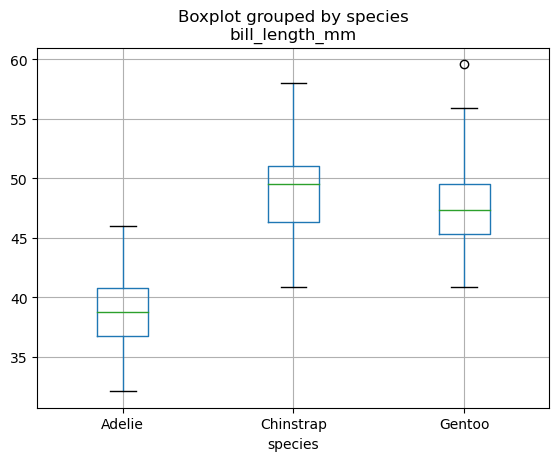

In [24]:
boxplot = df.boxplot(column=['bill_length_mm'], by='species')    

### Histogram - Bill depth

We can use the same approach as above to plot a histogram of the bill depth for each species of penguin.



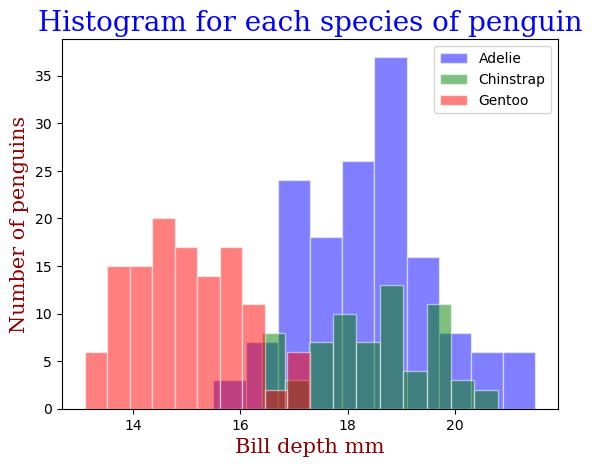

In [25]:
adelie = df[df.species == "Adelie"] #Create a new data frame with only the Adelie penguins.
chinstrap = df[df.species=='Chinstrap'] #Create a new data frame with only the Chinstrap penguins.
Gentoo = df[df.species=='Gentoo']  #Create a new data frame with only the Gentoo penguins.

fx, ax = plt.subplots()

variable = "bill_depth_mm"  #Choose a variable to plot the histogram of.

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

ax.hist(adelie[variable], bins=10, label="Adelie", color="blue", alpha=0.5, edgecolor="white") 
#Plot a histogram of the variable for the Adelie penguins. bins=10 means that the histogram will have 10 bins.
#alpha=0.5 means that the bars will be semi-transparent. alpha=1 would mean that the bars are opaque.
#alpha=0 would mean that the bars are completely transparent.
ax.hist(chinstrap[variable], bins=10, label="Chinstrap", color="green", alpha=0.5, edgecolor="white")
ax.hist(Gentoo[variable], bins=10, label="Gentoo", color="red", alpha=0.5, edgecolor="white")

ax.set_xlabel(variable.capitalize().replace('_',' '), fontdict=font2)     #Set the x-axis label.
ax.set_ylabel("Number of penguins", fontdict=font2) #Set the y-axis label.

ax.set_title("Histogram for each species of penguin", fontdict=font1) #Set the title of the plot.
ax.legend() #Show the legend.


Or by using the seaborn histplot code.....

Text(0.5, 1.0, 'Histogram for each species of penguin')

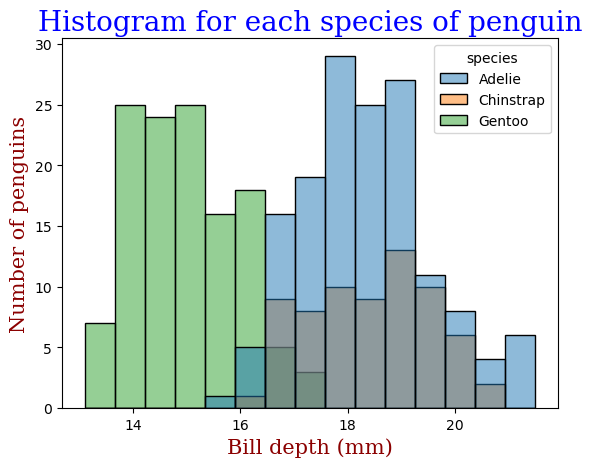

In [26]:
sns.histplot(df, x="bill_depth_mm",  stat='count', bins=15, hue="species") 
#Plot a histogram of the bill depth for each species of penguin using seaborn.

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotl
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Bill depth (mm)", fontdict=font2) #Set the x-axis label.
plt.ylabel("Number of penguins", fontdict=font2) #Set the y-axis label.

plt.title("Histogram for each species of penguin", fontdict=font1) #Set the title of the plot.


## Select two variables from the dataset and provide an analysis of how correlated they are

What two variable would be best to correlate. Perhaps by creating a correlation matrix for the whole dataset we would understand which variables are better to correlate. Looking at the results it can be seen that the flipper length vs body mass are the variables with the highest correlation. There seems to be excellent correlation overall between these two variables, so let's analyse variables further to try and gain further details. To do this lets drop any rows that contain NA values and then we can convert our arrays for flipper length and body mass back into numpy arrays and see how the correlation using numpy arrays compares to the results without using the numpy arrays. Are they close? Are they the same? Is there any difference?

In [27]:
#Drop the species, island and sex columns from the data frame as these are not numerical.
df_numerical = df.drop(columns=['species', 'island', 'sex']) 

In [28]:
#Calculate the correlation between the numerical columns in the data frame.
df_numerical.corr() 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<Axes: >

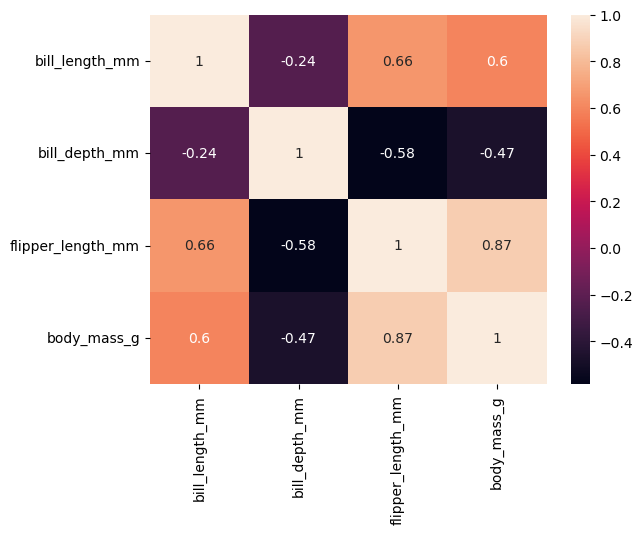

In [29]:
#Plot a heatmap of the correlation between the numerical columns in the data frame.
sns.heatmap(df_numerical.corr(), annot=True) 

In [30]:
#Get the mean values for each species of penguin for the numerical columns
df.groupby("species").agg({"flipper_length_mm": 'mean', 'bill_length_mm' : 'mean', 'bill_depth_mm' : 'mean', 'body_mass_g' : 'mean'})

,flipper_length_mm,bill_length_mm,bill_depth_mm,body_mass_g
species,,,,
Adelie,189.953642,38.791391,18.346358,3700.662252
Chinstrap,195.823529,48.833824,18.420588,3733.088235
Gentoo,217.186992,47.504878,14.982114,5076.016260


In [31]:
#Plot a scatter plot of the flipper length vs the body mass for all the penguins in the dataset.
#Firstly we need to drop the rows with the missing values
df_without_na = df.dropna() 

#Create a new data series with the flipper length data and convert it to a numpy array.
flipper_len = df_without_na['flipper_length_mm'] 


flipper_len = flipper_len.to_numpy() #Convert the data series to a numpy array.


In [32]:
#Create a new data series with the body mass data and convert it to a numpy array.
body_mass = df_without_na['body_mass_g'] #Create a new data series with the body mass data.

body_mass = body_mass.to_numpy() #Convert the data series to a numpy array.

Text(0.5, 1.0, 'Palmer Penguins')

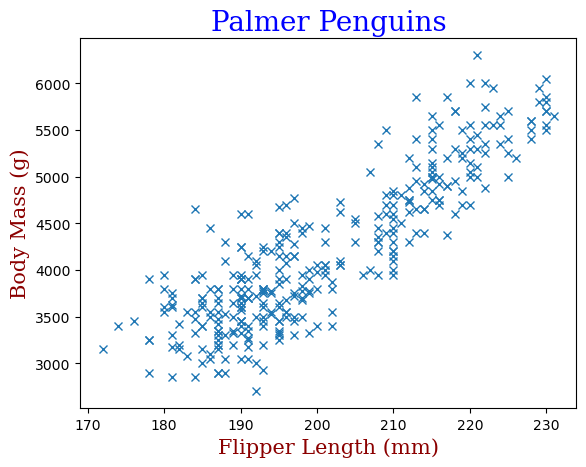

In [33]:
 # Create a new figure and set of axes.
fig, ax = plt.subplots()

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Simple plot.
ax.plot(flipper_len, body_mass, 'x')

# Axis labels.
ax.set_xlabel('Flipper Length (mm)', fontdict=font2)
ax.set_ylabel('Body Mass (g)', fontdict=font2)

# Title.
ax.set_title('Palmer Penguins', fontdict=font1)


In [34]:
#Lets look at the line of best fit between flipper length and body mass

# Fit a straight line between x and y.
m, c = np.polyfit(flipper_len, body_mass, 1)

# Show m and c.
m, c

(50.15326594224113, -5872.092682842824)

Text(0.5, 1.0, 'Palmer Penguins')

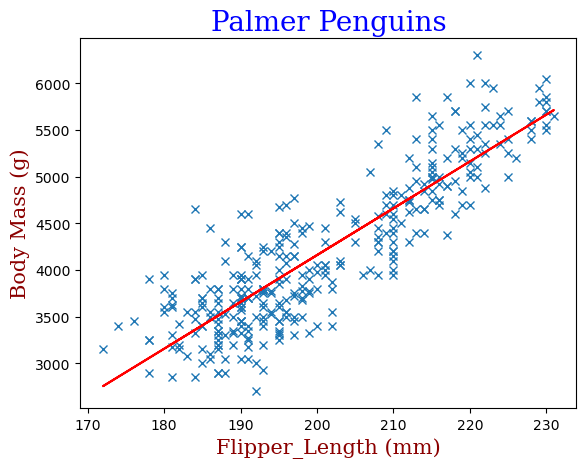

In [35]:
# Create a new figure and set of axes.
fig, ax = plt.subplots()

#Set the font for the x and y axis labels and the title (https://www.w3schools.com/python/matplotlib_labels.asp)
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Simple plot.
ax.plot(flipper_len, body_mass, 'x')

# Simple plot.
ax.plot(flipper_len, m * flipper_len+ c, 'r-')

# Axis labels.
ax.set_xlabel('Flipper_Length (mm)', fontdict=font2)
ax.set_ylabel('Body Mass (g)', fontdict=font2)

# Title.
ax.set_title('Palmer Penguins', fontdict=font1) 


Looking at the plots above and the correlation results below, confirms our earlier findings that the flipper length and body mass are closely correlation between the overall species of penguins. 

In [36]:
# Measure the correlation.
using_numpy = np.corrcoef(flipper_len, body_mass)  

print(using_numpy)

#Overall correlation between flipper length and body mass.
without_using_numpy = df['body_mass_g'].corr(df['flipper_length_mm'])

print(without_using_numpy)


[[1.        0.8729789]
 [0.8729789 1.       ]]
0.871201767306011


How about if we separate out each species on its own. Will this change the correlation between flipper length vs body mass? Let's have a look at this below and see if it does make any difference.

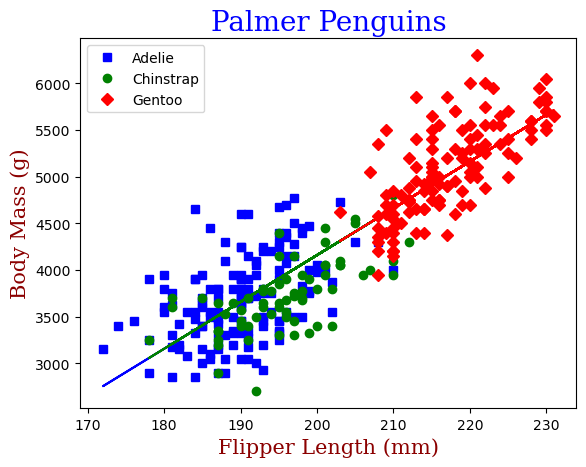

In [37]:
#Lets examing each species of penguin individually and see if there is a correlation between flipper length and body mass.
flipper_len_adelie = flipper_len[df_without_na['species'] == 'Adelie'] #Create a new data series with the flipper length data for Adelie penguins.

body_mass_adelie = body_mass[df_without_na['species'] == 'Adelie'] 
#Create a new data series with the body mass data for Adele penguins. 

flipper_len_chinstrap = flipper_len[df_without_na['species'] == 'Chinstrap'] #Create a new data series with the flipper length data for Chinstrap penguins.

body_mass_chinstrap = body_mass[df_without_na['species'] == 'Chinstrap'] 
#Create a new data series with the body mass data for Chinstrap penguins.

flipper_len_gentoo = flipper_len[df_without_na['species'] == 'Gentoo'] #Create a new data series with the flipper length data for Gentoo penguins.

body_mass_gentoo = body_mass[df_without_na['species'] == 'Gentoo'] 
#Create a new data series with the body mass data for Gentoo penguins.

fig, ax = plt.subplots() #Create a new figure and axis.

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Simple plot.

#Plot the flipper length against the body mass for Adelie penguins.
ax.plot(flipper_len_adelie, body_mass_adelie, 's', label='Adelie', color='blue') 
#Plot the line of best fit for the Adelie penguins.
ax.plot(flipper_len_adelie, m * flipper_len_adelie+ c, 'b-')
#Plot the flipper length against the body mass for Chinstrap penguins.
ax.plot(flipper_len_chinstrap, body_mass_chinstrap, 'o', label='Chinstrap', color='green') 
#Plot the line of best fit for the Chinstrap penguins.
ax.plot(flipper_len_chinstrap, m * flipper_len_chinstrap+ c, 'g-')
#Plot the flipper length against the body mass for Gentoo penguins.
ax.plot(flipper_len_gentoo, body_mass_gentoo, 'D', label='Gentoo', color='red') 
#Plot the line of best fit for the Gentoo penguins.
ax.plot(flipper_len_gentoo, m * flipper_len_gentoo+ c, 'r-')

# Axis labels.
ax.set_xlabel('Flipper Length (mm)', fontdict=font2) #Set the x-axis label.
ax.set_ylabel('Body Mass (g)', fontdict=font2) #Set the y-axis label.

# Title.
ax.set_title('Palmer Penguins', fontdict=font1) #Set the title of the plot.

# Show the legend.
ax.legend()


In [38]:
# Measure the correlation for Adelie penguins between flipper length and body mass.
adelie_correlation = np.corrcoef(flipper_len_adelie, body_mass_adelie) 

adelie_correlation

array([[1.        , 0.46485393],
       [0.46485393, 1.        ]])

In [39]:
# Measure the correlation for Chinstrap penguins between flipper length and body mass.
chinstrap_correlation = np.corrcoef(flipper_len_chinstrap, body_mass_chinstrap)

chinstrap_correlation


array([[1.        , 0.64155941],
       [0.64155941, 1.        ]])

In [40]:
# Measure the correlation for Gentoo penguins between flipper length and body mass.
gentoo_correlation = np.corrcoef(flipper_len_gentoo, body_mass_gentoo)

gentoo_correlation


array([[1.        , 0.71130526],
       [0.71130526, 1.        ]])


<p style="background:black">
<code style="background:black;color:white">C:\Users\Mike> pip3 install roughviz
</code>
</p>

*** 
### End